In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings 
from sklearn.metrics import balanced_accuracy_score
import numpy as np 
warnings.filterwarnings('ignore')

In [6]:
df_test=pd.read_csv(r"C:\Users\navde\Downloads\census_data_test.csv")
df_train=pd.read_csv(r"C:\Users\navde\Downloads\census_data_train.csv")

In [7]:
df_train = df_train.iloc[:, :-2]
df_test = df_test.iloc[:, :-2]

In [8]:
df_train.replace('?', pd.NA, inplace=True)
df_test.replace('?', pd.NA, inplace=True)

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [9]:
df_train['native_country'] = df_train['native_country'].apply(lambda x: 'Non-US' if x != 'United-States' else x)
df_test['native_country'] = df_test['native_country'].apply(lambda x: 'Non-US' if x != 'United-States' else x)

In [10]:
y= df_test["income_bracket"]
z= df_train["income_bracket"]


df_test_target = (y== ">50K.").astype(int)
df_train_target= (z== ">50K").astype(int)

In [11]:

selected_columns = ['workclass', 'education_num', 'Age', 'relationship', 'native_country', 'occupation']


df_train_feature = df_train[selected_columns]

In [12]:

selected_columns = ['workclass', 'education_num', 'Age', 'relationship', 'native_country', 'occupation']


df_test_feature = df_test[selected_columns]

In [13]:
categorical_columns = ['workclass', 'relationship', 'native_country', 'occupation']

for i in categorical_columns:
    le=LabelEncoder()
    df_train_feature[i]=le.fit_transform(df_train_feature[i])




In [14]:
for i in categorical_columns:
    le=LabelEncoder()
    df_test_feature[i]=le.fit_transform(df_test_feature[i])

## finding the best k value for knn model

In [15]:
best_k = None
best_balanced_accuracy = 0

# Try different values of k from 1 to 51
for k in range(1, 52):
    # Create k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(df_train_feature, df_train_target)

    # Make predictions on the test set
    y_pred = knn.predict(df_test_feature)

    # Calculate balanced accuracy
    current_balanced_accuracy = balanced_accuracy_score(df_test_target, y_pred)

    # Update best k and balanced accuracy if the current one is better
    if current_balanced_accuracy > best_balanced_accuracy:
        best_k = k
        best_balanced_accuracy = current_balanced_accuracy

# Print the results
print(f"Best k: {best_k}")
print(f"Best Balanced Accuracy: {best_balanced_accuracy}")

Best k: 7
Best Balanced Accuracy: 0.7153452131709174


# After running svm model for most of the kernal and tunning hyperparameter i got below best configuration

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [10], 'kernel': ['rbf'], 'gamma': [0.1]}

# Create an SVM model
svm_model = SVC()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, scoring='balanced_accuracy', cv=3)
grid_search.fit(df_train_feature, df_train_target)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_svm_model = grid_search.best_estimator_
svm_predictions = best_svm_model.predict(df_test_feature)
# Calculate the balanced accuracy of the SVM model
svm_balanced_accuracy = balanced_accuracy_score(df_test_target, svm_predictions)

# Print the results of the SVM model
print(f"SVM Model - Balanced Accuracy: {svm_balanced_accuracy}")

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Model - Balanced Accuracy: 0.7386084411876666


## For Male we performed KNN and SVM

In [22]:
# Filter rows with 'Male' in the gender column
df_train_male= df_train[df_train['gender'] == 'Male']
# Filter rows with 'Male' in the gender column
df_test_male = df_test[df_test['gender'] == 'Male']

In [23]:
selected_columns = ['workclass', 'education_num', 'Age', 'relationship', 'native_country', 'occupation']
df_train_feature_male = df_train_male[selected_columns]

In [24]:
df_test_feature_male = df_test_male[selected_columns]

In [25]:
z= df_train_male["income_bracket"]
y= df_test_male["income_bracket"]

df_test_target_male= (y== ">50K.").astype(int)
df_train_target_male= (z== ">50K").astype(int)

In [26]:
categorical_columns = ['workclass', 'relationship', 'native_country', 'occupation']

for i in categorical_columns:
    le=LabelEncoder()
    df_train_feature_male[i]=le.fit_transform(df_train_feature_male[i])

In [27]:
for i in categorical_columns:
    le=LabelEncoder()
    df_test_feature_male[i]=le.fit_transform(df_test_feature_male[i])

In [28]:
best_k = None
best_balanced_accuracy = 0

# Try different values of k from 1 to 51
for k in range(1, 52):
    # Create k-NN classifier
    knn_male= KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn_male.fit(df_train_feature_male, df_train_target_male)

    # Make predictions on the test set
    y_pred_male= knn_male.predict(df_test_feature_male)

    # Calculate balanced accuracy
    current_balanced_accuracy = balanced_accuracy_score(df_test_target_male, y_pred_male)

    # Update best k and balanced accuracy if the current one is better
    if current_balanced_accuracy > best_balanced_accuracy:
        best_k = k
        best_balanced_accuracy = current_balanced_accuracy

# Print the results
print(f"Best k: {best_k}")
print(f"Best Balanced Accuracy: {best_balanced_accuracy}")

Best k: 41
Best Balanced Accuracy: 0.722873938859173


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [10], 'kernel': ['rbf'], 'gamma': [0.1]}

# Create an SVM model
svm_model = SVC()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, scoring='balanced_accuracy', cv=3)
grid_search.fit(df_train_feature_male, df_train_target_male)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_svm_model = grid_search.best_estimator_
svm_predictions = best_svm_model.predict(df_test_feature_male)
# Calculate the balanced accuracy of the SVM model
svm_balanced_accuracy = balanced_accuracy_score(df_test_target_male, svm_predictions)

# Print the results of the SVM model
print(f"SVM Model - Balanced Accuracy: {svm_balanced_accuracy}")

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Model - Balanced Accuracy: 0.7322500410201489


## For Female we performed KNN and SVM

In [30]:
# Filter rows with 'Male' in the gender column
df_train_female= df_train[df_train['gender'] == 'Female']
# Filter rows with 'Male' in the gender column
df_test_female = df_test[df_test['gender'] == 'Female']

In [31]:
selected_columns = ['workclass', 'education_num', 'Age', 'relationship', 'native_country', 'occupation']
df_train_feature_female = df_train_female[selected_columns]


In [32]:
df_test_feature_female = df_test_female[selected_columns]

In [33]:
a= df_train_female["income_bracket"]
b= df_test_female["income_bracket"]

df_test_target_female = (b== ">50K.").astype(int)
df_train_target_female= (a== ">50K").astype(int)

In [34]:
categorical_columns = ['workclass', 'relationship', 'native_country', 'occupation']

for i in categorical_columns:
    le=LabelEncoder()
    df_train_feature_female[i]=le.fit_transform(df_train_feature_female[i])

In [35]:
for i in categorical_columns:
    le=LabelEncoder()
    df_test_feature_female[i]=le.fit_transform(df_test_feature_female[i])

In [36]:
best_k_ = None
best_balanced_accuracy_ = 0

# Try different values of k from 1 to 51
for k in range(1, 100):
    # Create k-NN classifier
    knn_female = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn_female.fit(df_train_feature_female, df_train_target_female)

    # Make predictions on the test set
    y_pred_female = knn_female.predict(df_test_feature_female)
    # Calculate balanced accuracy
    current_balanced_accuracy = balanced_accuracy_score(df_test_target_female, y_pred_female)
    # Update best k and balanced accuracy if the current one is better
    if current_balanced_accuracy > best_balanced_accuracy_:

        best_k_= k
        best_balanced_accuracy_= current_balanced_accuracy

# Print the results
print(f"Best k: {best_k_}")
print(f"Best Balanced Accuracy: {best_balanced_accuracy_}")

Best k: 1
Best Balanced Accuracy: 0.5659739223473514


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [10], 'kernel': ['rbf'], 'gamma': [0.1]}

# Create an SVM model
svm_model = SVC()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, scoring='balanced_accuracy', cv=3)
grid_search.fit(df_train_feature_female, df_train_target_female)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_svm_model = grid_search.best_estimator_
svm_predictions = best_svm_model.predict(df_test_feature_female)
# Calculate the balanced accuracy of the SVM model
svm_balanced_accuracy = balanced_accuracy_score(df_test_target_female, svm_predictions)

# Print the results of the SVM model
print(f"SVM Model - Balanced Accuracy: {svm_balanced_accuracy}")

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Model - Balanced Accuracy: 0.534384979219319


In [38]:

# Define a function to calculate Equal Opportunity Difference (EOD)
def equal_opportunity_difference(y_true, y_pred, positive_label):
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    
    # Calculate equal opportunity difference
    eod = (tp / (tp + fn)) - (fp / (fp + tn))
    
    return eod

# Define a function to calculate Average Absolute Odds Difference (AAOD)
def average_abs_odds_difference(y_true, y_pred, positive_label):
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    
    # Calculate average absolute odds difference
    aaod = 0.5 * (
        abs((tp / (tp + fn)) - (fp / (fp + tn))) +
        abs((tn / (tn + fp)) - (fn / (fn + tp)))
    )
    
    return aaod



In [39]:
# Assuming you have predictions from two models: model_male and model_female
y_pred_male = knn_male.predict(df_test_feature_male)
y_pred_female = knn_female.predict(df_test_feature_female)

# Assuming you have ground truth labels for both groups: y_true_male and y_true_female
y_true_male = df_test_target_male
y_true_female = df_test_target_female



# Calculate fairness metrics for each group
eod_male = equal_opportunity_difference(y_true_male, y_pred_male, positive_label=1)
eod_female = equal_opportunity_difference(y_true_female, y_pred_female, positive_label=1)

aaod_male = average_abs_odds_difference(y_true_male, y_pred_male, positive_label=1)
aaod_female = average_abs_odds_difference(y_true_female, y_pred_female, positive_label=1)

# Print the results
print(f"EOD for Male: {eod_male}")
print(f"EOD for Female: {eod_female}")
print(f"AAOD for Male: {aaod_male}")
print(f"AAOD for Female: {aaod_female}")

EOD for Male: 0.44024118393870837
EOD for Female: 0.01436265709156194
AAOD for Male: 0.44024118393870837
AAOD for Female: 0.014362657091561933


In [46]:
# Make predictions for both models on test data
k=7
y_pred_knn = knn.predict(df_test_feature)
y_pred_svm = best_svm_model.predict(df_test_feature)

# Calculate fairness metrics for k-NN model
eod_knn = equal_opportunity_difference(df_test_target, y_pred_knn, positive_label=1)
aaod_knn = average_abs_odds_difference(df_test_target, y_pred_knn, positive_label=1)

# Calculate fairness metrics for SVM model
eod_svm = equal_opportunity_difference(df_test_target, y_pred_svm, positive_label=1)
aaod_svm = average_abs_odds_difference(df_test_target, y_pred_svm, positive_label=1)

# Print the results for k-NN model
print("Fairness Metrics for k-NN Model:")
print(f"EOD: {eod_knn}")
print(f"AAOD: {aaod_knn}")

# Print the results for SVM model
print("\nFairness Metrics for SVM Model:")
print(f"EOD: {eod_svm}")
print(f"AAOD: {aaod_svm}")

Fairness Metrics for k-NN Model:
EOD: 0.3944428054815379
AAOD: 0.3944428054815379

Fairness Metrics for SVM Model:
EOD: 0.4772168823753331
AAOD: 0.4772168823753331


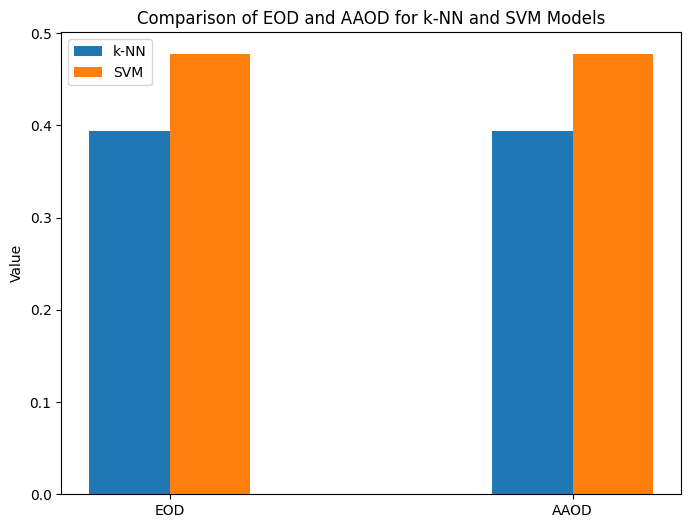

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Fairness metrics for k-NN model
eod_knn = 0.3944428054815379
aaod_knn = 0.3944428054815379

# Fairness metrics for SVM model
eod_svm = 0.4772168823753331
aaod_svm = 0.4772168823753331

# Metrics and models
metrics = ['EOD', 'AAOD']
knn_values = [eod_knn, aaod_knn]
svm_values = [eod_svm, aaod_svm]

# Bar width
bar_width = 0.20
bar_distance = 0.15

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for k-NN and SVM
bar1 = ax.bar(np.arange(len(metrics)) - bar_width / 2, knn_values, bar_width, label='k-NN')
bar2 = ax.bar(np.arange(len(metrics)) + bar_width / 2, svm_values, bar_width, label='SVM')

ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics)
ax.set_ylabel('Value')
ax.set_title('Comparison of EOD and AAOD for k-NN and SVM Models')
ax.legend()

# Display the plot
plt.show()


## 
Based on the provided fairness scores, the k-NN model appears to have lower disparity in predicting the positive class across different groups compared to the SVM model. Both the Equal Opportunity Difference (EOD) and Average Absolute Odds Difference (AAOD) are lower for the k-NN model.

the k-NN model appears to be a more favorable choice due to its lower EOD and AAOD.


The real-world implications of deploying an unfair model can have significant consequences, especially when it comes to decision-making processes that impact individuals or groups

Discrimination and Bias:

An unfair model may lead to discriminatory outcomes, favoring one group over another. In the context dataset, this could mean biased predictions or decisions related to certain individuals or demographic groups.